<a href="https://colab.research.google.com/github/iAmirHosein92/Class_Exercise_Solution/blob/main/diabets_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

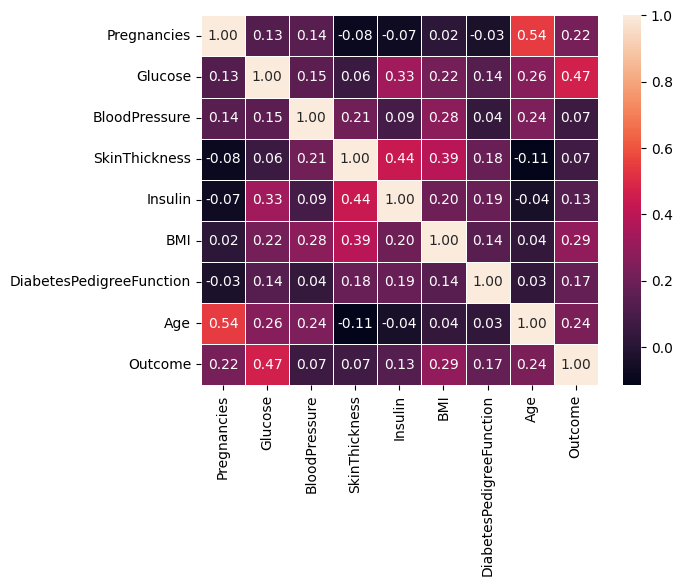

In [7]:
sns.heatmap(df.corr() , annot=True , fmt='0.2f' , linewidth=0.5 )

<Axes: xlabel='Outcome', ylabel='count'>

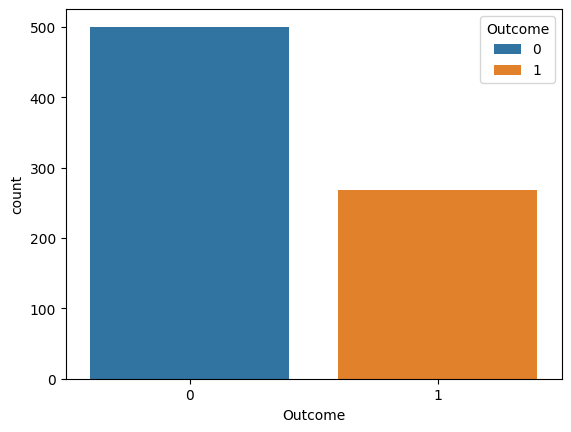

In [10]:
sns.countplot(x=df['Outcome'], hue=df['Outcome'])

In [13]:
columns = df.columns[:-1]
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

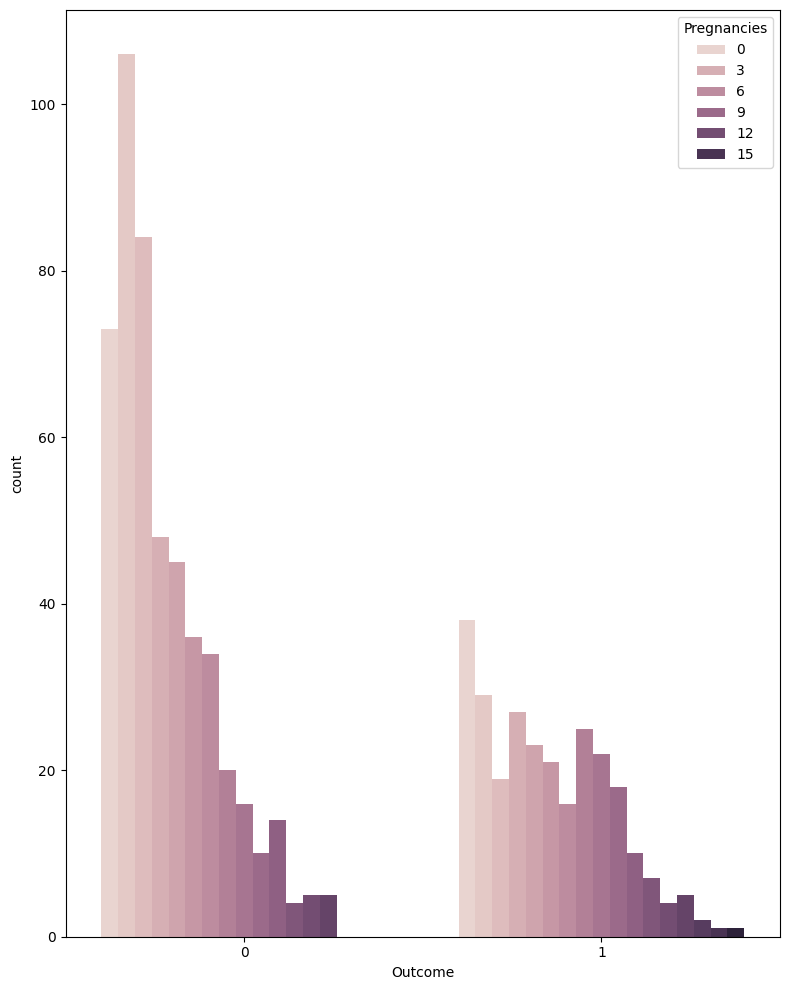

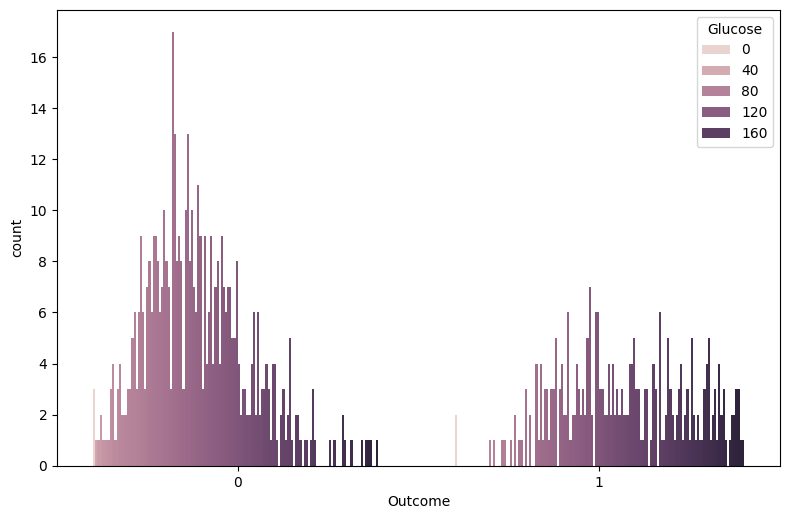

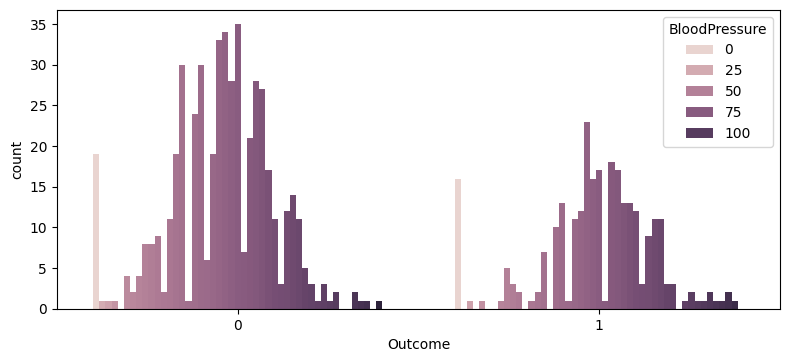

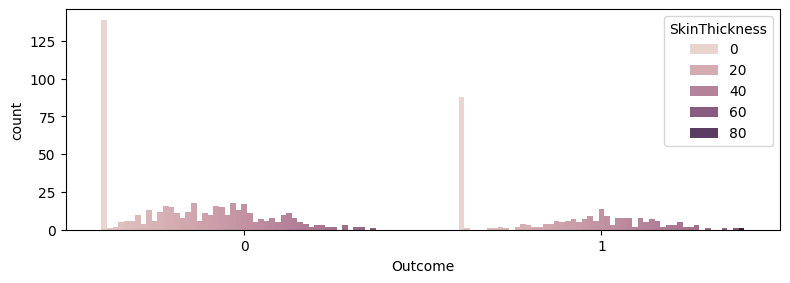

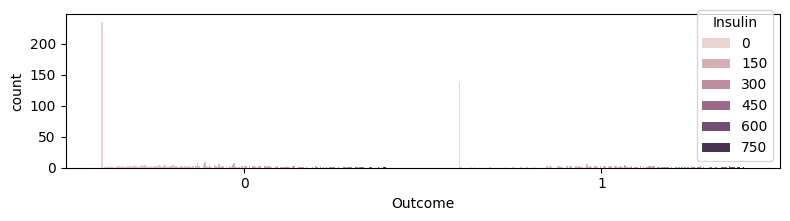

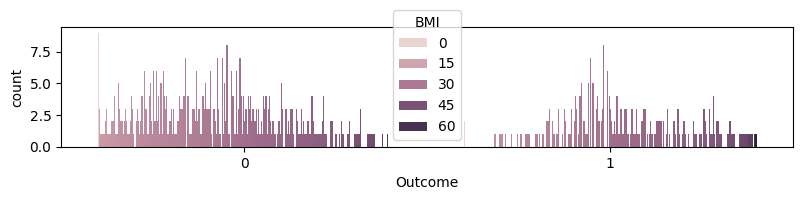

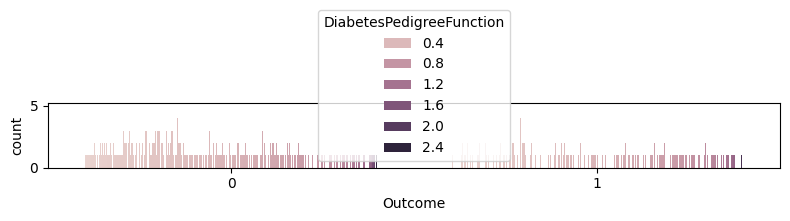

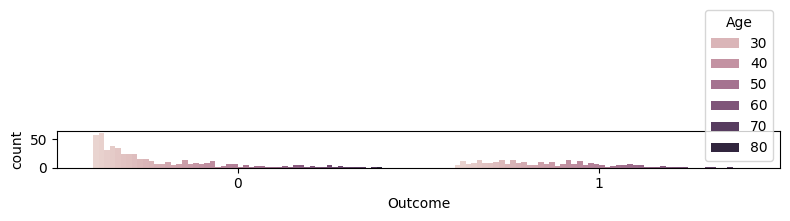

In [24]:

for i, col in enumerate(columns):
  plt.figure(figsize=(8, 10))
  plt.subplot(i+1, 1,i+1)
  sns.countplot(x=df['Outcome'], hue=df[col])
  plt.tight_layout()
  plt.show()

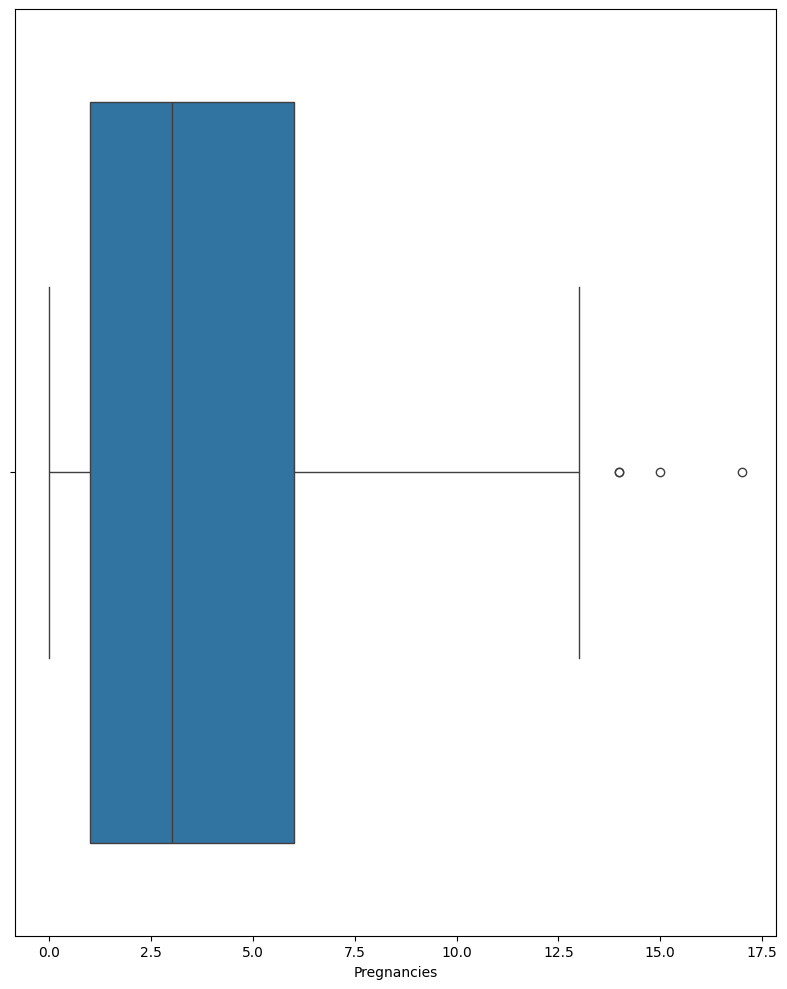

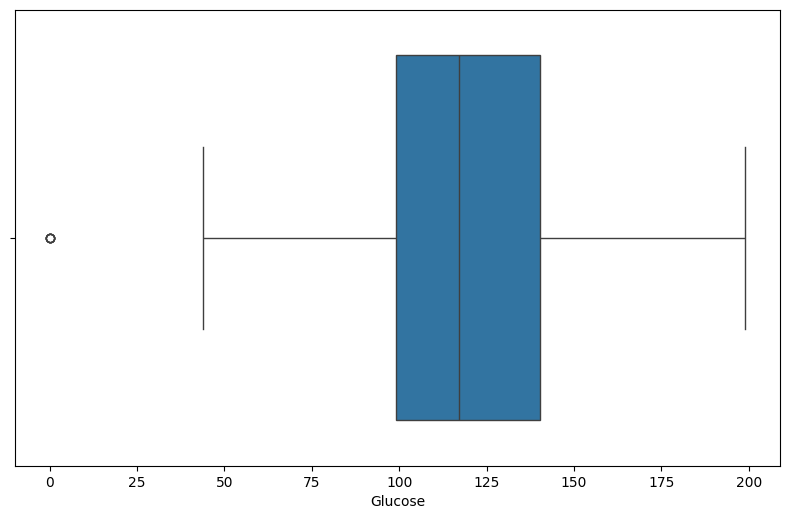

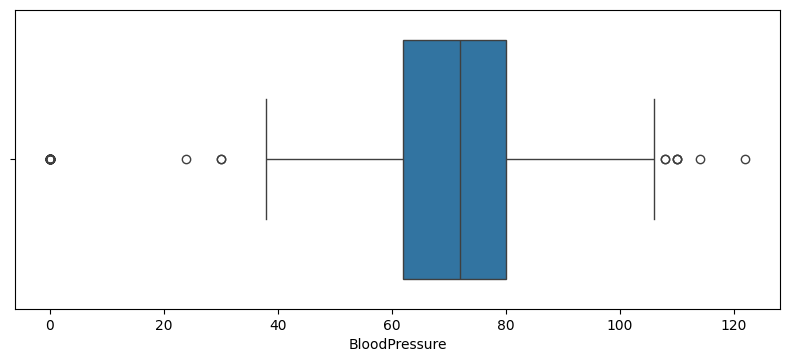

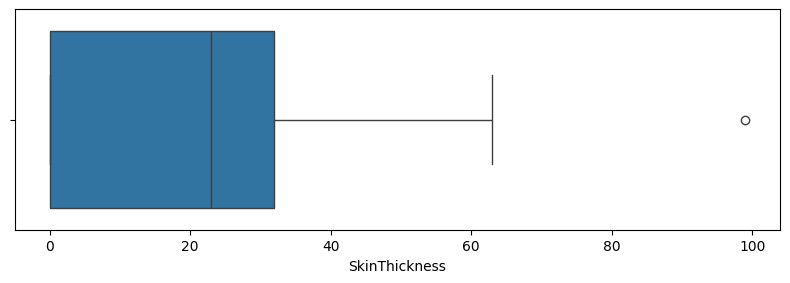

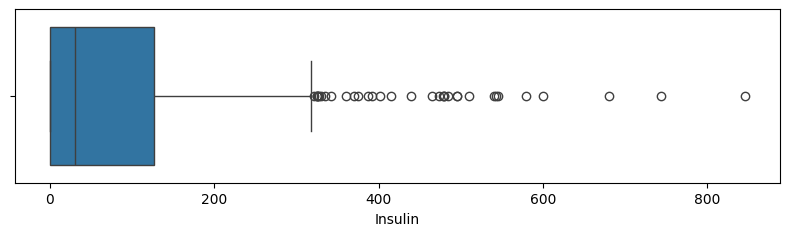

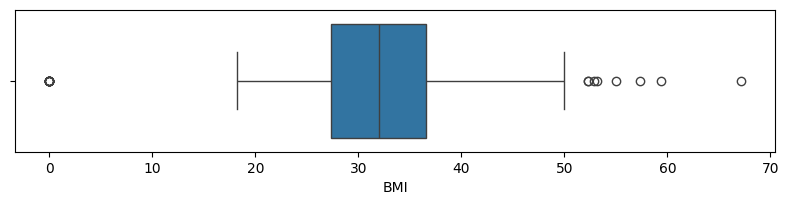

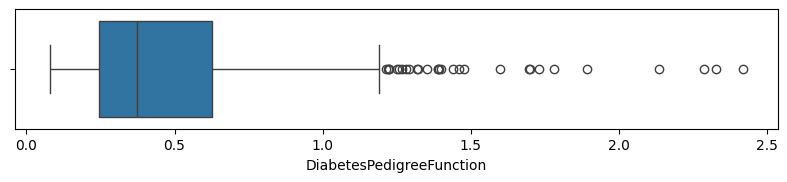

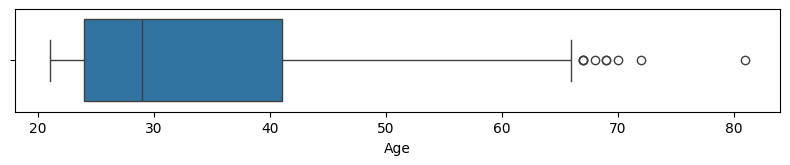

In [26]:
for i, col in enumerate(columns):
  plt.figure(figsize=(8, 10))
  plt.subplot(i+1, 1,i+1)
  sns.boxplot(x=df[col])
  plt.tight_layout()
  plt.show()

In [27]:
def remove_outliers_iqr(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]


In [28]:
df_clean = remove_outliers_iqr(df)
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [29]:
features = df_clean.drop('Outcome', axis=1)
target = df_clean['Outcome']

In [30]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [31]:
target

,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score ,f1_score ,recall_score

In [44]:
models = {
    'RandomForest':(RandomForestClassifier(), {
        'n_estimators' : [50, 100, 150],
        'max_depth' : [None, 5, 10]
    }),
    'SVM':(SVC(),{
         'C':[0.1, 1, 10],
           'kernel':['rbf', 'linear']}),
    'LogisticRegression':(LogisticRegression(),{
        'C':[0.1, 1, 10],
        'max_iter':[1000]
    }),
    'GradientBoosting':(GradientBoostingClassifier(),{
                        'n_estimators':[50, 100, 150],
                        'learning_rate':[0.01, 0.1, 0.2],
                        'max_depth':[3, 4, 5]})
}

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.3)

In [46]:
for name, (model, params) in models.items():
  grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
  grid.fit(X_train, y_train)
  print(f'{name}:')
  print('--' * 50)
  print(f'Best Params: {grid.best_params_}')
  print(f'Best Score: {grid.best_score_:.4f}')
  y_pred = grid.best_estimator_.predict(X_test)
  print(classification_report(y_test, y_pred))
  print('*' * 30)

RandomForest:
----------------------------------------------------------------------------------------------------
Best Params: {'max_depth': 5, 'n_estimators': 150}
Best Score: 0.7785
              precision    recall  f1-score   support

           0       0.78      0.94      0.86       132
           1       0.76      0.43      0.55        60

    accuracy                           0.78       192
   macro avg       0.77      0.69      0.70       192
weighted avg       0.78      0.78      0.76       192

SVM:
----------------------------------------------------------------------------------------------------
Best Params: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.7695
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       132
           1       0.76      0.42      0.54        60

    accuracy                           0.78       192
   macro avg       0.77      0.68      0.69       192
weighted avg       0.77      0.78      0.75       1